# Introduction
Sentiment analysis is a natural language processing (NLP) technique used to determine the sentiment of textual data (Positive, Negative, or Neutral). It is used to assess brand popularity, customer feedback, customer needs, marketing campaign success rates, and competitor brand monitoring, among other things.

This study aims to assess brand engagement in terms of the number of tweets, likes, retweets, and sentiment of tweets about Fast Moving Consumer Brand (FFCare)

### Research Questions:

#### Track brand mentions and Identify Influencers
- Who are the users with the highest number of tweets
- Which location has the the highest number of tweets
- Which source has the highest number of tweets
- Which tweets have the highest number of likes and retweets


#### Measure Opinions
- What is the overall sentiment of all the tweets
- What is the sentiment of the tweet with the highest likes and retweet


### Data Source

### Methods/Techniques


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
tweets_2 = pd.read_csv("/content/drive/MyDrive/banthony_projects/tweets_2.csv", encoding="latin1")
tweets_2.shape

(212, 10)

### Dependencies

In [11]:
!pip install emot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.5 MB/s eta 0:00:00


In [18]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO


from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline


from scipy.special import softmax

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Preprocesing

In [7]:
# Get data
df = pd.read_csv("/content/drive/MyDrive/banthony_projects/tweets_2.csv", encoding="latin1")


In [14]:
# Clean the data

def format_text(text):
    text = text.lower()
    text = " ".join(re.sub("[^0-9A-Za-z]", " ", text).split())
    words = nltk.word_tokenize(text)

    wln = WordNetLemmatizer() # reducing the word to its root/ base form
    filtered_word = [wln.lemmatize(word) for word in words if word not in stopwords.words("english") ]



    filtered_word = " ".join(filtered_word)

    return text


df['formatted_tweet'] = df["tweet"].apply(format_text)
tweet_df = df[df['formatted_tweet'] != '']
tweet_df = df.reset_index(drop=True)


def format_location(text):
    text = text.lower()
    text = ' '.join(re.sub("[^0-9A-Za-z]",' ', text).split())
    return text

tweet_df['formatted_location'] = tweet_df['location'].apply(format_location)
tweet_df.head(2)

,unique_id,date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweets,formatted_tweet,formatted_location
0,@HealthyLife1011,2024-09-01,1.0,https://twitter.com/HealthyLife101/status/1,@HealthyLife101,Twitter Web App,"New York, NY",Loving FFCare's new organic shampoo! My hair f...,120,15,loving ffcare s new organic shampoo my hair fe...,new york ny
1,@FitFamChris2,2024-09-02,2.0,https://twitter.com/FitFamChris/status/2,@FitFamChris,Twitter for iPhone,"Los Angeles, CA","Just tried the FFCare protein bars. Not bad, b...",85,9,just tried the ffcare protein bars not bad but...,los angeles ca
2,@MommyOfTwo3,2024-09-03,3.0,https://twitter.com/MommyOfTwo/status/3,@MommyOfTwo,Twitter Web App,"Chicago, IL",FFCare baby wipes are a lifesaver! Gentle on m...,200,30,ffcare baby wipes are a lifesaver gentle on my...,chicago il
3,@GroomingGuru4,2024-09-01,4.0,https://twitter.com/GroomingGuru/status/4,@GroomingGuru,Twitter for Android,"Austin, TX",FFCare beard oil is a game-changer. My beard h...,150,25,ffcare beard oil is a game changer my beard ha...,austin tx
4,@EcoWarriorJane5,2024-09-01,5.0,https://twitter.com/EcoWarriorJane/status/5,@EcoWarriorJane,Twitter for iPhone,"San Francisco, CA",Love that FFCare's packaging is eco-friendly! ...,300,50,love that ffcare s packaging is eco friendly w...,san francisco ca


In [17]:
# Wranggling: Extract week, month and year from date


week_day = pd.to_datetime(tweet_df['date']).dt.strftime("%A")
tweet_df.insert(2, 'week_day',week_day)
week = pd.to_datetime(tweet_df['date']).dt.isocalendar().week.astype(int)
tweet_df.insert(3, 'week',week)
year_month = pd.to_datetime(tweet_df['date']).dt.strftime('%Y-%m')
tweet_df.insert(4, 'year_month',year_month)


tweet_df.drop(['ID','url'],axis=1, inplace=True)

tweet_df.head(2)

,unique_id,date,week_day,week,year_month,username,source,location,tweet,num_of_likes,num_of_retweets,formatted_tweet,formatted_location
0,@HealthyLife1011,2024-09-01,Sunday,35,2024-09,@HealthyLife101,Twitter Web App,"New York, NY",Loving FFCare's new organic shampoo! My hair f...,120,15,loving ffcare s new organic shampoo my hair fe...,new york ny
1,@FitFamChris2,2024-09-02,Monday,36,2024-09,@FitFamChris,Twitter for iPhone,"Los Angeles, CA","Just tried the FFCare protein bars. Not bad, b...",85,9,just tried the ffcare protein bars not bad but...,los angeles ca


# Track brand mentions and Identify Influencers

### 1. Who are the users with the highest number of tweets

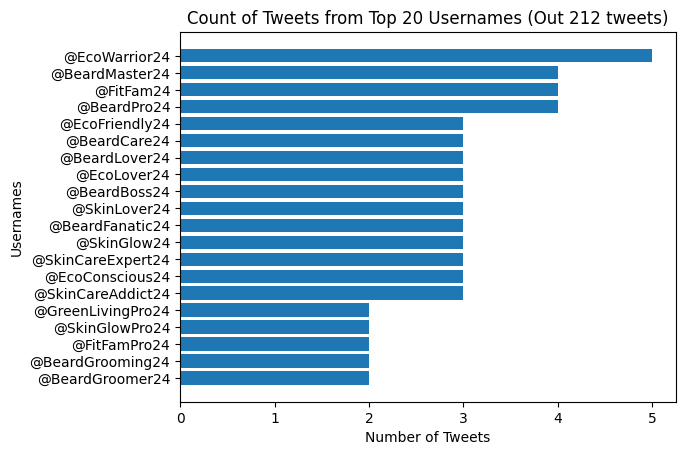

In [19]:
count_of_tweets_dict = tweet_df['username'].value_counts().head(20).to_dict()

def top_20_usernames(dict):
    usernames = []
    for key,value in count_of_tweets_dict.items():
        usernames.append(key)
    return usernames


def no_of_tweets_username(dict):
    no_of_tweets = []
    for key,value in count_of_tweets_dict.items():
        no_of_tweets.append(value)
    return no_of_tweets

usernames = top_20_usernames(count_of_tweets_dict)
no_of_tweets = no_of_tweets_username(count_of_tweets_dict)
total_tweets = tweet_df['tweet'].shape[0]


plt.barh(usernames, no_of_tweets)
# plt.xlabel('usernames')
plt.xlabel('Number of Tweets')
plt.ylabel('Usernames')
plt.title(f'Count of Tweets from Top 20 Usernames (Out {total_tweets} tweets)')

plt.gca().invert_yaxis()


In [20]:
tweet_df['username'].nunique()

158

### 2. Which location has the the highest number of tweets

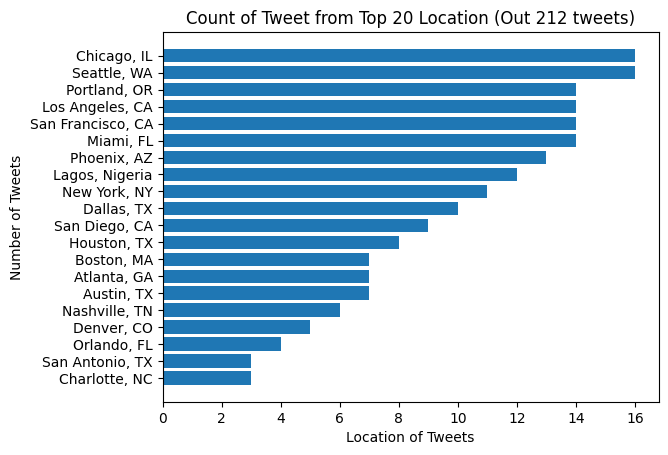

In [22]:
location_of_tweets_dict = tweet_df['location'].value_counts().head(20).to_dict()

def top_20_location(dict):
    location = []
    for key,value in location_of_tweets_dict.items():
        location.append(key)
    return location


def no_of_tweets_location(dict):
    no_of_tweets_location = []
    for key,value in location_of_tweets_dict.items():
        no_of_tweets_location.append(value)
    return no_of_tweets_location

location_of_tweets = top_20_location(location_of_tweets_dict)
no_of_tweets_location = no_of_tweets_location(location_of_tweets_dict)
total_tweets = tweet_df['tweet'].shape[0]



plt.barh(location_of_tweets, no_of_tweets_location)
# plt.xlabel('usernames')
plt.xlabel('Location of Tweets')
plt.ylabel('Number of Tweets')
plt.title(f'Count of Tweet from Top 20 Location (Out {total_tweets} tweets)')

plt.gca().invert_yaxis()

### 3. Which source has the highest number of tweets

In [24]:
source_of_tweets = top_20_sources(source_of_tweets_dict)
source_of_tweets

['Twitter Web App', 'Twitter for iPhone', 'Twitter for Android']

In [25]:
source_of_tweets_dict

{'Twitter Web App': 89, 'Twitter for iPhone': 71, 'Twitter for Android': 52}

In [34]:
no_of_tweets = no_of_tweets_sources(source_of_tweets_dict)
no_of_tweets

[5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2]

In [31]:
def top_20_sources(dict):
    sources = []
    for key,value in source_of_tweets_dict.items():
        sources.append(key)
    return sources


source_of_tweets_dict = tweet_df['source'].value_counts().head(20).to_dict()
top_20_sources(source_of_tweets_dict)

['Twitter Web App', 'Twitter for iPhone', 'Twitter for Android']

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (20,) and arg 3 with shape (3,).

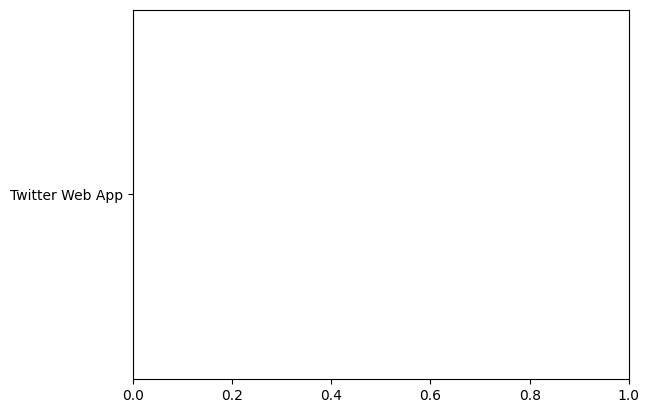

In [32]:
source_of_tweets_dict = tweet_df['source'].value_counts().head(20).to_dict()

def top_20_sources(dict):
    sources = []
    for key,value in source_of_tweets_dict.items():
        sources.append(key)
    return sources


def no_of_tweets_sources(dict):
    no_of_tweets_sources = []
    for key,value in source_of_tweets_dict.items():
        no_of_tweets_sources.append(value)
    return no_of_tweets

source_of_tweets = top_20_sources(source_of_tweets_dict)
no_of_tweets = no_of_tweets_sources(source_of_tweets_dict)
total_tweets = tweet_df['tweet'].shape[0]



plt.barh(source_of_tweets, no_of_tweets)
plt.xlabel('Number of Tweets')
plt.ylabel('Source of Tweets')
plt.title(f'Count of Tweet from Top 20 Sources (Out {total_tweets} tweets)')

plt.gca().invert_yaxis()

### 4. Which tweets have the highest number of likes and retweets

In [35]:
tweet_df_likes =  tweet_df[['username','num_of_likes']]
tweet_df_likes.sort_values('num_of_likes', ascending=False).head(10)

,username,num_of_likes
24,@EcoMomma,300
4,@EcoWarriorJane,300
78,@EcoFriendly24,295
102,@EcoFan24,290
135,@EcoLife24,290
59,@GreenMom24,290
32,@SustainablyJane,290
115,@GreenHeart24,290
96,@EcoMama24,285
68,@SustainableLife24,285


# Measure Opinions

 Carry-out sentiment analysis using  cardiffnlp/twitter-roberta-base-sentiment model

### 1. What is the overall sentiment of all the tweets

In [36]:

from transformers import (
    AutoTokenizer,
    AutoConfig,
    AutoModelForSequenceClassification,
    TFAutoModelForSequenceClassification,
    pipeline,
)



In [37]:
""" Sentiment analysis on the whole string """

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

sentiment_data = []
for index, row in tweet_df.iterrows():
    tweet = row["tweet"]
    unique_id = row["unique_id"]
    encoded_input = tokenizer(
        tweet, return_tensors="pt", max_length=512, truncation=True
    )
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = torch.nn.functional.softmax(torch.from_numpy(scores), dim=0).numpy()

    negative_score = scores[config.label2id["negative"]]
    positive_score = scores[config.label2id["positive"]]
    neutral_score = scores[config.label2id["neutral"]]

    highest_score = max(negative_score, positive_score, neutral_score)
    highest_label_index = np.argmax(scores)
    highest_label = config.id2label[
        np.argmax(scores)
    ]  # Get label index and convert to label

    highest_score_dict = {config.id2label[highest_label_index]: highest_score}

    sentiment_data.append(
        {
            "unique_id": unique_id,
            "tweet": tweet,
            "negative_sentiment": negative_score,
            "positive_sentiment": positive_score,
            "neutral_sentiment": neutral_score,
            "overall_sentiment": highest_label,
            # 'overall_sentiment': highest_score_dict
        }
    )

roberta_base_sentiment_df = pd.DataFrame(sentiment_data)
roberta_base_sentiment_df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,unique_id,tweet,negative_sentiment,positive_sentiment,neutral_sentiment,overall_sentiment
0,@HealthyLife1011,Loving FFCare's new organic shampoo! My hair f...,0.003419,0.985501,0.011081,positive
1,@FitFamChris2,"Just tried the FFCare protein bars. Not bad, b...",0.593632,0.073348,0.333020,negative
2,@MommyOfTwo3,FFCare baby wipes are a lifesaver! Gentle on m...,0.004063,0.983487,0.012451,positive
3,@GroomingGuru4,FFCare beard oil is a game-changer. My beard h...,0.004907,0.981495,0.013598,positive
4,@EcoWarriorJane5,Love that FFCare's packaging is eco-friendly! ...,0.003411,0.983959,0.012630,positive


In [39]:

tweets_sentiment_df = pd.concat([tweet_df, roberta_base_sentiment_df], axis=1, join="inner")
# tweets_sentiment_df.to_csv("/content/drive/MyDrive/banthony_projects/tweets_sentiment_df.csv", index=False)

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/banthony_projects/tweets_sentiment_df.csv")
# df.head()

In [40]:

sentiments = tweets_sentiment_df['overall_sentiment'].value_counts()
sentiments.to_frame('num_of_tweets')

,num_of_tweets
overall_sentiment,
positive,207
negative,3
neutral,2


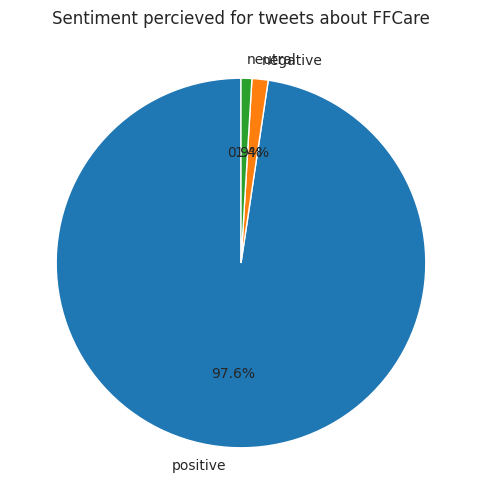

In [43]:
labels = ['positive','negative','neutral']
values = sentiments.to_frame('num_of_tweets')['num_of_tweets']

sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
plt.pie(sentiments, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment percieved for tweets about FFCare')

plt.show()

### 2. What is the sentiment of the tweet with the highest likes and retweet

In [56]:
tweet_with_highest_likes = tweets_sentiment_df.sort_values('num_of_likes', ascending=False).head(1)
tweet_with_highest_likes

,unique_id,date,week_day,week,year_month,username,source,location,tweet,num_of_likes,num_of_retweets,formatted_tweet,formatted_location,unique_id,tweet,negative_sentiment,positive_sentiment,neutral_sentiment,overall_sentiment
24,@EcoMomma25,2024-09-04,Wednesday,36,2024-09,@EcoMomma,Twitter for iPhone,"San Francisco, CA",Love the eco-friendly packaging of FFCareâ??s ...,300,50,love the eco friendly packaging of ffcare s pr...,san francisco ca,@EcoMomma25,Love the eco-friendly packaging of FFCareâ??s ...,0.003246,0.980019,0.016735,positive


In [63]:
print(tweet_with_highest_likes['formatted_tweet'].loc[24])


love the eco friendly packaging of ffcare s products every brand should follow their lead ffcare sustainability


In [67]:
tweet_with_highest_retweets = tweets_sentiment_df.sort_values('num_of_retweets', ascending=False).head(1)
tweet_with_highest_retweets

,unique_id,date,week_day,week,year_month,username,source,location,tweet,num_of_likes,num_of_retweets,formatted_tweet,formatted_location,unique_id,tweet,negative_sentiment,positive_sentiment,neutral_sentiment,overall_sentiment
24,@EcoMomma25,2024-09-04,Wednesday,36,2024-09,@EcoMomma,Twitter for iPhone,"San Francisco, CA",Love the eco-friendly packaging of FFCareâ??s ...,300,50,love the eco friendly packaging of ffcare s pr...,san francisco ca,@EcoMomma25,Love the eco-friendly packaging of FFCareâ??s ...,0.003246,0.980019,0.016735,positive


### Tweets with negative sentiments

In [70]:
tweets_sentiment_df.query(''' overall_sentiment == 'negative' ''' )

,unique_id,date,week_day,week,year_month,username,source,location,tweet,num_of_likes,num_of_retweets,formatted_tweet,formatted_location,unique_id,tweet,negative_sentiment,positive_sentiment,neutral_sentiment,overall_sentiment
1,@FitFamChris2,2024-09-02,Monday,36,2024-09,@FitFamChris,Twitter for iPhone,"Los Angeles, CA","Just tried the FFCare protein bars. Not bad, b...",85,9,just tried the ffcare protein bars not bad but...,los angeles ca,@FitFamChris2,"Just tried the FFCare protein bars. Not bad, b...",0.593632,0.073348,0.333020,negative
64,@BeardGrooming2465,2024-09-04,Wednesday,36,2024-09,@BeardGrooming24,Twitter Web App,"Dallas, TX",Canâ??t go a day without using FFCare beard oi...,145,20,can t go a day without using ffcare beard oil ...,dallas tx,@BeardGrooming2465,Canâ??t go a day without using FFCare beard oi...,0.362631,0.317685,0.319684,negative
81,@Disappointed2,2024-09-04,Wednesday,36,2024-09,@Disappointed,Twitter Web App,"Lagos, Nigeria",Disappointed with FFCare's shampoo. It left my...,3,2,disappointed with ffcare s shampoo it left my ...,lagos nigeria,@Disappointed2,Disappointed with FFCare's shampoo. It left my...,0.932413,0.005943,0.061644,negative


In [71]:
print(tweets_sentiment_df['formatted_tweet'].loc[81])


disappointed with ffcare s shampoo it left my hair feeling dry and frizzy ffcare haircare


# Findings